In [31]:
%matplotlib inline

import pandas as pd
import numpy as np
import datetime
import matplotlib
import matplotlib.pyplot as plt
from reference import get_file_names

In [32]:
df_ref = pd.read_csv('./vidas_data/cross_ref_cols_tabs.csv')
# df_ref.head()

In [33]:
# get the data frame giving the list of IDEHRs who have passed
get_file_names(['IDEHR', 'IDDecesso'], df_ref)

['wH_DirectTable_Decesso', 'wH_DirectTable_C_Decesso']

In [34]:
# get the data frame giving the list of IDEHRs with the start date of hospitalization
get_file_names(['IDEHR', 'DateTherapy'], df_ref)

['wH_Therapy_JCM_Therapy', 'wH_Therapy_JCM_TherapyWhenNeeded']

In [35]:
# get the data frame giving the list of IDEHRs with the diagnosis
get_file_names(['IDEHR', 'Diagnosi'], df_ref)

['wH_DirectTable_Informazioni_SS', 'wH_DirectTable_C_Informazioni_SS']

In [36]:
# data frame with deathID
df_death = pd.read_csv('./vidas_data/wH_DirectTable_Decesso.csv', parse_dates=['Data'])
df_death = df_death[['IDEHR', 'Data', 'PatientId', 'EHRType', 'IDDecesso']]
print(df_death.shape)
df_death.head()

(6526, 5)


,IDEHR,Data,PatientId,EHRType,IDDecesso
0,4,2015-01-09 16:15:00,59,EHR,1
1,1022,2015-01-11 00:15:00,90,EHR,2
2,16,2015-01-15 01:45:00,71,EHR,3
3,1025,2015-01-15 06:44:00,91,EHR,4
4,6,2015-01-20 14:50:00,61,EHR,5


In [37]:
# check NaNs
df_death.isna().sum()

IDEHR         0
Data         87
PatientId     0
EHRType       0
IDDecesso     0
dtype: int64

In [38]:
# data frame with start of hospitalization
df_soh = pd.read_csv('./vidas_data/wH_Therapy_JCM_Therapy.csv', parse_dates=['DateTherapy'])
print(df_soh.shape)
df_soh = df_soh[['IDEHR', 'DateTherapy']].drop_duplicates(subset=['IDEHR'], keep='first')
print(df_soh.shape)
df_soh.head()

(292176, 39)
(2341, 2)


,IDEHR,DateTherapy
0,2,2015-01-09
9,1020,2015-01-10
34,3,2015-01-10
41,5,2015-01-10
50,6,2015-01-10


In [39]:
# check NaNs
df_soh.isna().sum()

IDEHR          0
DateTherapy    0
dtype: int64

In [40]:
# data frame with diagnosis
df_diag = pd.read_csv('./vidas_data/wH_DirectTable_Informazioni_SS.csv')
df_diag = df_diag[['IDEHR', 'Diagnosi', 'PatientId', 'EHRType']]
print(df_diag.shape)
df_diag.head()

(10217, 4)


,IDEHR,Diagnosi,PatientId,EHRType
0,1239,"Trachea, bronchi e polmoni#909=1",91,AMB
1,1241,Stomaco#912=1,93,AMB
2,1242,Colon#877=1,92,AMB
3,1244,"Trachea, bronchi e polmoni#909=1",94,AMB
4,1244,"Trachea, bronchi e polmoni#909=1",94,AMB


In [41]:
# check NaNs
df_diag.isna().sum()

IDEHR         0
Diagnosi     57
PatientId     0
EHRType       0
dtype: int64

In [42]:
df_diag = df_diag.dropna()
print(df_diag.shape)
df_diag.isna().sum()

(10160, 4)


IDEHR        0
Diagnosi     0
PatientId    0
EHRType      0
dtype: int64

In [43]:
df_diag.Diagnosi.value_counts()

Trachea, bronchi e polmoni#909=1                                         1762
Pancreas#906=1                                                            853
Mammella#901=1                                                            710
Colon#877=1                                                               659
Fegato, dotti biliari intraepatici#891=1                                  556
Stomaco#912=1                                                             453
Encefalo#889=1                                                            404
Diagnosi non oncologica#881=1                                             403
Prostata#910=1                                                            346
Vescica#925=1                                                             300
Consulenza/Supporto#935=3                                                 277
Assistenza al Lutto#933=1                                                 262
Rene e altri e non specificati organi urinari#911=1             

In [44]:
# do the merge
from functools import reduce
dfs = [df_death, df_soh, df_diag]
df_referral = reduce(lambda left, right: pd.merge(left, right, on='IDEHR'), dfs)

In [45]:
# check why the same IDEHR has different PatientID + EHRType
df_referral

,IDEHR,Data,PatientId_x,EHRType_x,IDDecesso,DateTherapy,Diagnosi,PatientId_y,EHRType_y
0,16,2015-01-15 01:45:00,71,EHR,3,2015-01-11,Consulenza/Supporto#935=3,6,AMB
1,1047,2015-02-03 09:00:00,116,EHR,22,2015-01-28,Mammella#901=1,116,EHR
2,7,2015-03-12 14:45:00,62,EHR,59,2015-01-11,Consulenza/Supporto#935=3,3,AMB
3,10,2015-03-18 22:45:00,65,EHR,64,2015-01-10,Prostata#910=1,4,AMB
4,1223,2015-06-07 18:00:00,30546,EHR,147,2015-06-04,"Trachea, bronchi e polmoni#909=1",83,AMB
...,...,...,...,...,...,...,...,...,...
756,5247,2020-07-04 00:35:00,59630,EHR,7433,2020-06-26,Rene e altri e non specificati organi urinari#...,41563,AMB
757,5257,2020-07-08 13:00:00,59803,EHR,7452,2020-07-07,Lingua#917=5,41566,AMB
758,5245,2020-07-16 00:40:00,59725,EHR,7492,2020-06-27,Colon#877=1,41562,AMB
759,5267,2020-07-20 01:55:00,59250,EHR,7510,2020-07-13,Mammella#901=1,41569,AMB


In [46]:
# get the survival time (in days) for each patient
df_referral['survival_time_days'] = pd.to_timedelta(df_referral['Data'] - df_referral['DateTherapy']).dt.days
df_referral.head()

,IDEHR,Data,PatientId_x,EHRType_x,IDDecesso,DateTherapy,Diagnosi,PatientId_y,EHRType_y,survival_time_days
0,16,2015-01-15 01:45:00,71,EHR,3,2015-01-11,Consulenza/Supporto#935=3,6,AMB,4.0
1,1047,2015-02-03 09:00:00,116,EHR,22,2015-01-28,Mammella#901=1,116,EHR,6.0
2,7,2015-03-12 14:45:00,62,EHR,59,2015-01-11,Consulenza/Supporto#935=3,3,AMB,60.0
3,10,2015-03-18 22:45:00,65,EHR,64,2015-01-10,Prostata#910=1,4,AMB,67.0
4,1223,2015-06-07 18:00:00,30546,EHR,147,2015-06-04,"Trachea, bronchi e polmoni#909=1",83,AMB,3.0


In [47]:
print(df_referral.shape)
df_referral.survival_time_days.value_counts()

(761, 10)


1.0      102
2.0       71
4.0       60
3.0       46
5.0       45
        ... 
125.0      1
102.0      1
65.0       1
53.0       1
37.0       1
Name: survival_time_days, Length: 69, dtype: int64

In [48]:
print(df_referral.isna().sum())
df_referral = df_referral.dropna()

IDEHR                 0
Data                  1
PatientId_x           0
EHRType_x             0
IDDecesso             0
DateTherapy           0
Diagnosi              0
PatientId_y           0
EHRType_y             0
survival_time_days    1
dtype: int64


In [49]:
# translate the diagnosis to English
# from googletrans import Translator
# df_referral['Diagnosis'] = df_referral.Diagnosi.str.findall('(.+)#').to_frame()
# df_referral['Diagnosis'] = df_referral['Diagnosis'].apply(lambda x: x if isinstance(x, float) else x[0])

# translator = Translator()
# df_referral['Diagnosi'] = df_referral['Diagnosis'].apply(translator.translate, src='it', dest='en').apply(getattr, args=('text',))
# df_referral = df_referral.drop(columns = ['Diagnosis'])
# df_referral.head()

In [50]:
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_width()
        ax.annotate('{}'.format(height),
                    xy=(height, rect.get_y()),
                    xytext=(30, 0),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

In [51]:
with pd.option_context("display.max_rows", 1000):
    print(df_referral.survival_time_days.value_counts())

1.0      102
2.0       71
4.0       60
3.0       46
5.0       45
6.0       38
8.0       32
0.0       28
14.0      26
7.0       26
9.0       20
10.0      18
13.0      17
11.0      17
12.0      15
15.0      12
20.0      11
24.0      11
16.0      10
22.0       9
23.0       9
18.0       9
29.0       8
21.0       7
26.0       7
17.0       7
19.0       7
27.0       6
45.0       5
39.0       5
49.0       5
34.0       4
25.0       4
55.0       4
51.0       3
40.0       3
30.0       3
41.0       3
36.0       3
32.0       3
33.0       3
44.0       2
54.0       2
60.0       2
31.0       2
38.0       2
50.0       2
56.0       2
67.0       2
35.0       2
47.0       2
135.0      1
61.0       1
62.0       1
93.0       1
43.0       1
58.0       1
46.0       1
80.0       1
116.0      1
57.0       1
64.0       1
90.0       1
52.0       1
125.0      1
102.0      1
65.0       1
53.0       1
37.0       1
Name: survival_time_days, dtype: int64


In [52]:
print('Mean Survival (using index): ', np.mean(df_referral.survival_time_days.value_counts().index))
print('Survival Stddev (using index): ', np.std(df_referral.survival_time_days.value_counts().index, ddof=0))
print('Mean Survival: ', np.mean(df_referral.survival_time_days))
print('Survival Stddev: ', np.std(df_referral.survival_time_days, ddof=0))

Mean Survival (using index):  39.31884057971015
Survival Stddev (using index):  29.497969841036536
Mean Survival:  12.373684210526315
Survival Stddev:  16.258110271015134


<Figure size 1440x720 with 0 Axes>

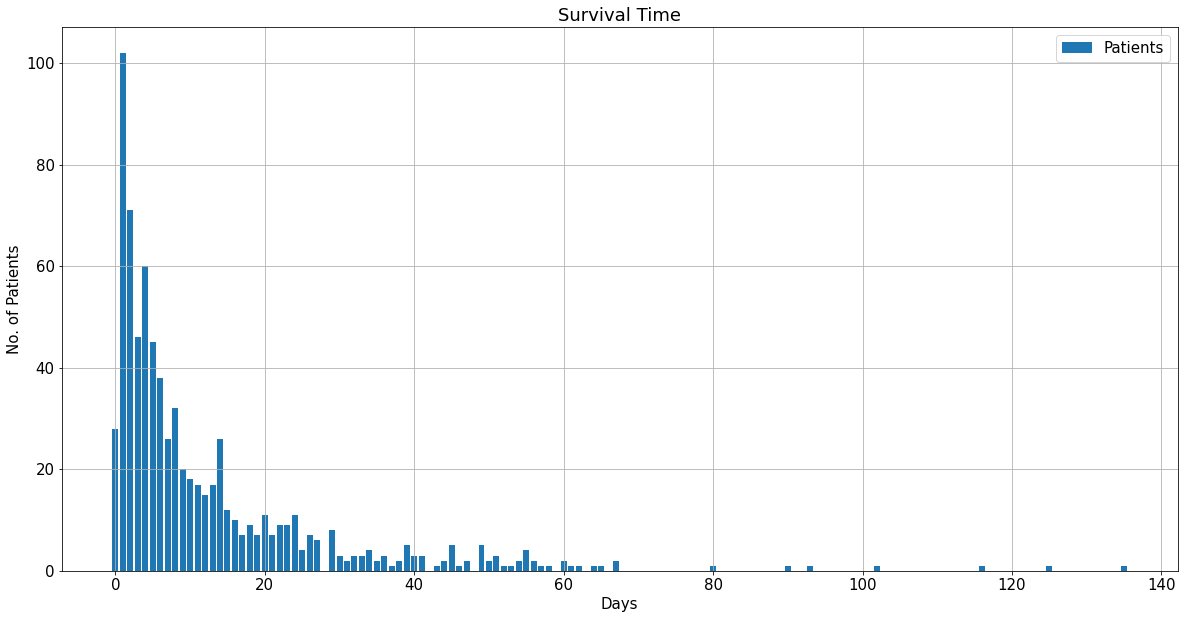

In [53]:
# get the survival time histogram for all patients
plt.rcParams['figure.figsize'] = [20, 10]
matplotlib.rcParams.update({'font.size': 15})
plt.figure()
labels = df_referral['survival_time_days'].value_counts().index
survival = df_referral['survival_time_days'].value_counts(normalize=False)
fig, ax = plt.subplots()
bar1 = ax.bar(labels, survival, label='Patients')
ax.set_xlabel('Days')
ax.set_ylabel('No. of Patients')
ax.set_title('Survival Time')
ax.legend()
plt.grid()
plt.savefig("./graphs/referral analysis/survival_time.png")
plt.show()

In [67]:
# get the survival time histogram for patients in each diagnosis
df_survival = df_referral[['Diagnosi', 'survival_time_days']].groupby(by=['Diagnosi']).mean()
df_survival_stddev = df_referral[['Diagnosi', 'survival_time_days']].groupby(by=['Diagnosi']).std(ddof=0)

In [68]:
df_survival

,survival_time_days
Diagnosi,
"Altre e mal definite sedi delle labbra, cavita' orale e faringe#920=8",6.000000
Altre e mal definite sedi#929=4,33.000000
Altre e non specificate parti della bocca#921=9,2.666667
Altri e non specificati organi genitali femminili#931=6,29.333333
Assistenza al Lutto#933=1,19.000000
Cardiopatia#884=4,10.181818
Cerebrovascolare#883=3,2.000000
Collo dell'utero#923=1,3.000000
Colon#877=1,13.916667


In [69]:
df_survival_stddev = df_survival_stddev.rename(columns={"survival_time_days": "survival_stddev"})
df_surv = pd.merge(df_survival, df_survival_stddev, on='Diagnosi').reset_index()
df_surv

,Diagnosi,survival_time_days,survival_stddev
0,"Altre e mal definite sedi delle labbra, cavita...",6.000000,4.062019
1,Altre e mal definite sedi#929=4,33.000000,16.673332
2,Altre e non specificate parti della bocca#921=9,2.666667,1.247219
3,Altri e non specificati organi genitali femmin...,29.333333,15.084945
4,Assistenza al Lutto#933=1,19.000000,24.627221
5,Cardiopatia#884=4,10.181818,9.475501
6,Cerebrovascolare#883=3,2.000000,2.000000
7,Collo dell'utero#923=1,3.000000,0.000000
8,Colon#877=1,13.916667,14.798977
9,Connettivo ed altri tessuti molli#903=1,20.333333,14.383633


In [70]:
from googletrans import Translator
df_surv['Diagnosis'] = df_surv.Diagnosi.str.findall('(.+)#').to_frame()
df_surv['Diagnosis'] = df_surv['Diagnosis'].apply(lambda x: x if isinstance(x, float) else x[0])

translator = Translator()
df_surv['Diagnosi'] = df_surv['Diagnosis'].apply(translator.translate, src='it', dest='en').apply(getattr, args=('text',))
df_surv = df_surv.drop(columns = ['Diagnosis']).sort_values(by='survival_time_days', ascending=False)
df_surv

,Diagnosi,survival_time_days,survival_stddev
22,Unspecified cell type leukemia,45.000000,0.000000
1,Other and ill-defined locations,33.000000,16.673332
3,Other and unspecified female genital organs,29.333333,15.084945
37,Pleura,24.272727,25.240987
46,Lymphoid and histocytic tissue,20.666667,23.156473
9,Connective and other soft tissues,20.333333,14.383633
32,Bones and articular cartilage,20.000000,6.000000
44,Without indication of location,19.800000,21.479292
4,Mourning assistance,19.000000,24.627221
47,"Thymus, heart and mediastinum",19.000000,0.000000


<Figure size 1440x1296 with 0 Axes>

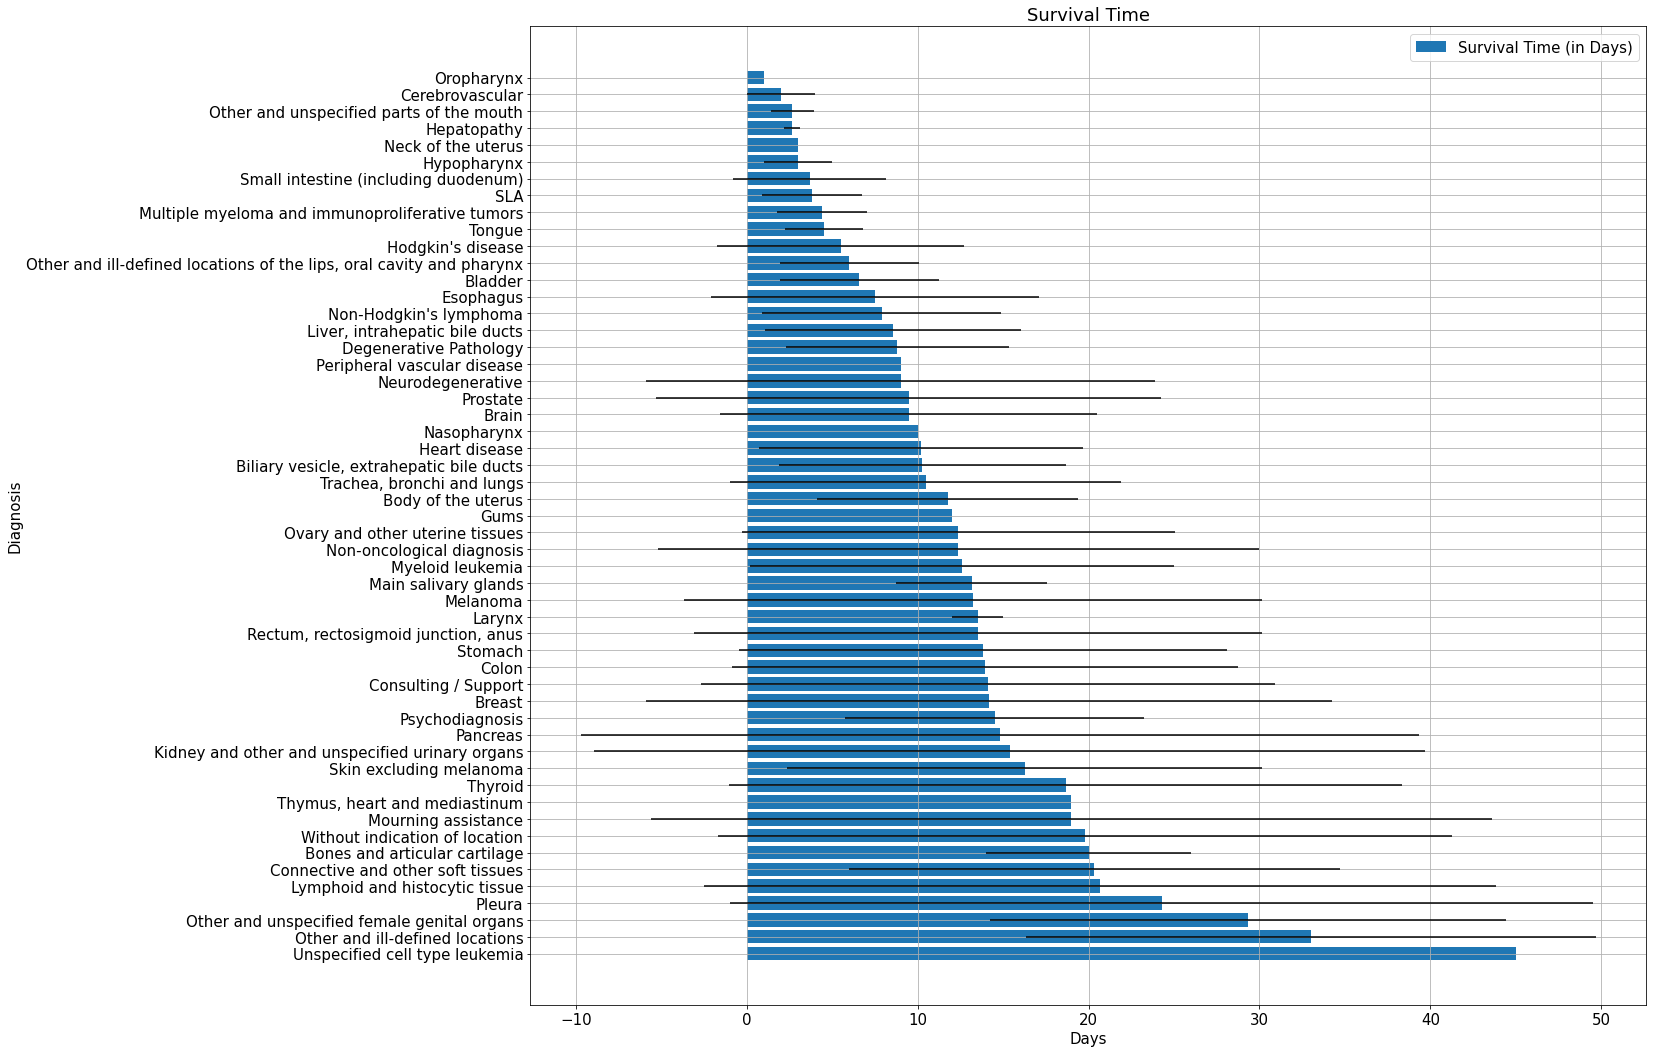

In [71]:
plt.rcParams['figure.figsize'] = [20, 18]
matplotlib.rcParams.update({'font.size': 15})
plt.figure()
labels = df_surv['Diagnosi']
survival = df_surv['survival_time_days']
errors = df_surv['survival_stddev']
fig, ax = plt.subplots()
bar1 = ax.barh(labels, survival, label='Survival Time (in Days)', xerr=errors)
ax.set_xlabel('Days')
ax.set_ylabel('Diagnosis')
ax.set_title('Survival Time')
ax.legend()
plt.grid()
plt.savefig("./graphs/referral analysis/survival_time_diagnosis.png")
plt.show()

In [ ]:
# First Definition: Split patients into early/late referral by using the criteria of +- 2 stddev for each diagnosis
